In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## Exploratory Data Analysis (EDA)

### Target

In [6]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Numeric VS Target

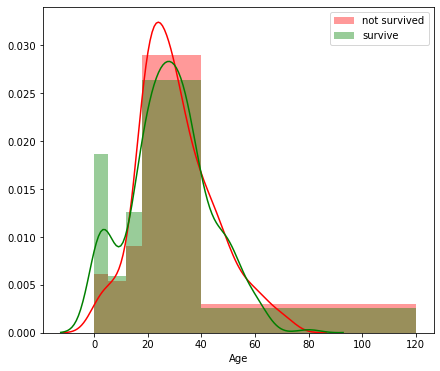

In [9]:
plt.figure(figsize=(7,6))
sns.distplot(df.Age[df.Survived == 0], bins=[0,5,12,18,40, 120], color='r', label='not survived')
sns.distplot(df.Age[df.Survived == 1], bins=[0,5,12,18,40, 120], color='g', label='survive')
plt.legend();

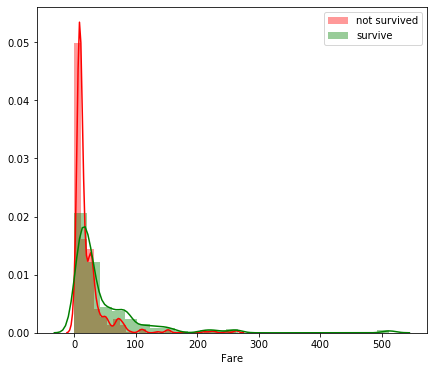

In [10]:
plt.figure(figsize=(7,6))
sns.distplot(df.Fare[df.Survived == 0], bins=25, color='r', label='not survived')
sns.distplot(df.Fare[df.Survived == 1], bins=25, color='g', label='survive')
plt.legend();

### Categoric/Targer VS Target

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


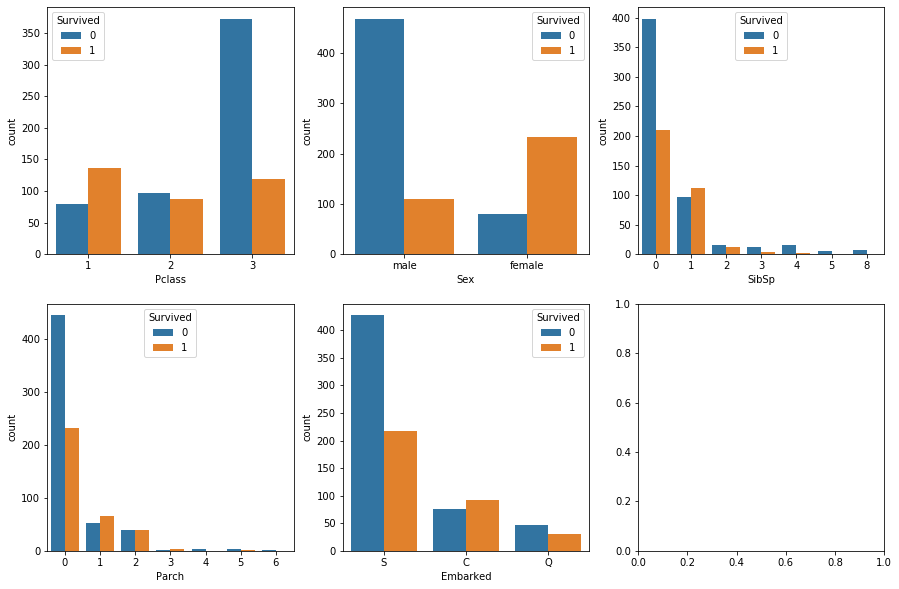

In [19]:
cat_var = ["Pclass","Sex", "SibSp", "Parch", "Embarked"]
fig, axes = plt.subplots(2,3, figsize=(15,10))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue="Survived", ax=ax)

### Pandas Crosstab (optional)

In [21]:
pd.crosstab(df.Pclass, df.Survived, normalize="index")

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


## Featuring Engineer

### Adding feature => isAlone

In [22]:
df["isAlone"] = (df.SibSp == 0) & (df.Parch == 0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,False
2,1,1,female,38.0,1,0,71.2833,C,False
3,1,3,female,26.0,0,0,7.9250,S,True
4,1,1,female,35.0,1,0,53.1000,S,False
5,0,3,male,35.0,0,0,8.0500,S,True


### Bining

#### Age

In [23]:
df.Age = pd.cut(df.Age, [0,5,12,18,40, 120], labels=["balita", "anak-anak", "remaja", "dewasa", "lansia"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,7.2500,S,False
2,1,1,female,dewasa,1,0,71.2833,C,False
3,1,3,female,dewasa,0,0,7.9250,S,True
4,1,1,female,dewasa,1,0,53.1000,S,False
5,0,3,male,dewasa,0,0,8.0500,S,True


#### Fare

In [ ]:
df.Age = pd.cut(df.Fare, [0,25,100,18,40, 120], labels=["balita", "anak-anak", "remaja", "dewasa", "lansia"])
df.head()